 # PREDICTIVE BATTING ANALYTICS

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Reading the data from the csv file  

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/Virat_Kohli.csv')

In [4]:
df.head()

,Runs,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,12,22,1,0,54.54,2.0,lbw,1,v Sri Lanka,Dambulla,18-Aug-08
1,37,67,6,0,55.22,2.0,caught,2,v Sri Lanka,Dambulla,20-Aug-08
2,25,38,4,0,65.78,1.0,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08
3,54,66,7,0,81.81,1.0,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08
4,31,46,3,1,67.39,1.0,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Runs        132 non-null    int64  
 1   BF          132 non-null    int64  
 2   4s          132 non-null    int64  
 3   6s          132 non-null    int64  
 4   SR          132 non-null    float64
 5   Pos         132 non-null    float64
 6   Dismissal   132 non-null    object 
 7   Inns        132 non-null    int64  
 8   Opposition  132 non-null    object 
 9   Ground      132 non-null    object 
 10  Start Date  132 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 11.5+ KB


In [6]:
df['Opposition'].value_counts()

v Sri Lanka       24
v England         21
v Australia       20
v West Indies     19
v South Africa    15
v New Zealand     14
v Bangladesh       8
v Zimbabwe         5
v Pakistan         4
v Ireland          1
v Netherlands      1
Name: Opposition, dtype: int64

In [7]:
df.describe()

,Runs,BF,4s,6s,SR,Pos,Inns
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,46.848485,50.871212,4.371212,0.545455,76.991212,3.303030,1.575758
std,41.994635,38.729716,4.404032,1.086795,37.874491,0.873174,0.496110
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,10.000000,17.750000,1.000000,0.000000,61.702500,3.000000,1.000000
50%,32.500000,42.500000,3.000000,0.000000,78.710000,3.000000,2.000000
75%,80.250000,82.250000,7.000000,1.000000,100.000000,4.000000,2.000000
max,154.000000,140.000000,18.000000,7.000000,209.090000,7.000000,2.000000


In [8]:
df["Runs"].sum()

6184

In [9]:
df.isnull().sum()

Runs          0
BF            0
4s            0
6s            0
SR            0
Pos           0
Dismissal     0
Inns          0
Opposition    0
Ground        0
Start Date    0
dtype: int64

In [10]:
df.count()

Runs          132
BF            132
4s            132
6s            132
SR            132
Pos           132
Dismissal     132
Inns          132
Opposition    132
Ground        132
Start Date    132
dtype: int64

In [11]:
df['Runs'].mean()

46.84848484848485

In [12]:

#  Converting 'Start Date' column to datetime format
df['Start Date'] = pd.to_datetime(df['Start Date'])

# Extracting the year from the 'Start Date' column
df['Year'] = df['Start Date'].dt.year
runs_by_year = df.groupby('Year')['Runs'].sum()
runs_by_year


Year
2008     159
2009     230
2010     726
2011    1302
2012     444
2013    1100
2014     995
2015     304
2016     739
2017     185
Name: Runs, dtype: int64

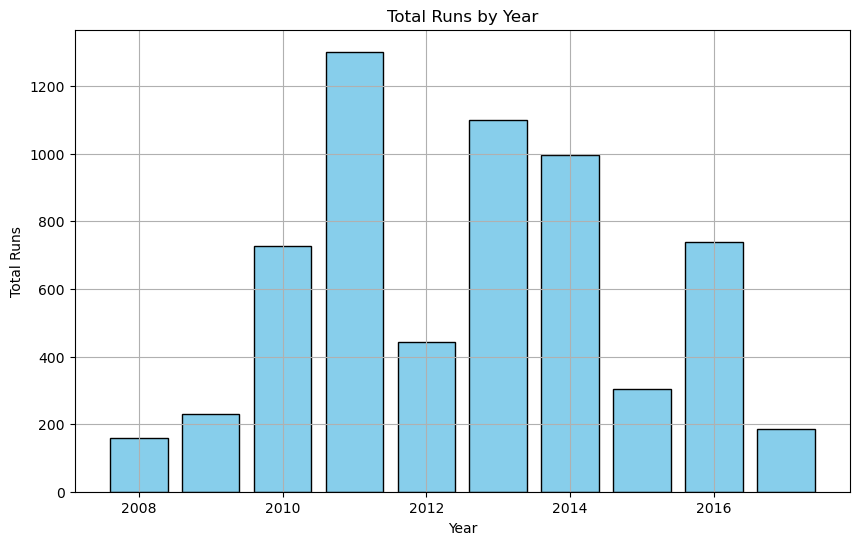

In [13]:
plt.figure(figsize=(10, 6))
plt.bar(runs_by_year.index, runs_by_year.values, color='skyblue', edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Total Runs')
plt.title( 'Total Runs by Year')
plt.grid(True)

# Step 2: Show the plot
plt.show()

In [14]:
df['Year'] = df['Start Date'].dt.year
# Filtering the data for centuries
centuries = df[df['Runs'] >= 100]

# Calculating the total number of centuries
total_centuries = centuries.shape[0]

#Printing the total number of centuries
print("Total Number of Centuries in ODI till 2017:", total_centuries)


Total Number of Centuries in ODI till 2017: 23


In [15]:

#Grouping the filtered DataFrame by 'Year' column
grouped_by_year = centuries.groupby('Year')

#Counting the number of centuries in each group
centuries_count = grouped_by_year.size()

# Finding the year with the maximum count of centuries
year_with_most_centuries = centuries_count.idxmax()
most_centuries_count = centuries_count.max()

# Printing the year with the most number of centuries
print("Year with the most centuries:", year_with_most_centuries)
print("Number of centuries:", most_centuries_count)

Year with the most centuries: 2011
Number of centuries: 4


In [24]:
total_fours = df['4s'].sum()
total_sixes = df['6s'].sum()
boundaries=total_fours+total_sixes
boundaries

649

In [26]:
balls_faced= df['BF'].sum()
balls_faced

6715

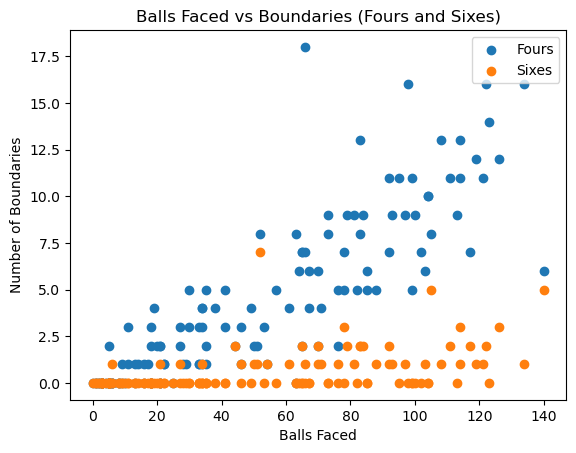

In [34]:
# Plotting the scatter plot
plt.scatter(df['BF'], df['4s'], label='Fours')
plt.scatter(df['BF'], df['6s'], label='Sixes')
plt.xlabel('Balls Faced')
plt.ylabel('Number of Boundaries')
plt.title('Balls Faced vs Boundaries (Fours and Sixes)')
plt.legend()
plt.show()


In [36]:
dismissals = df['Dismissal'].unique()
print(dismissals)

['lbw' 'caught' 'run out' 'bowled' 'not out' 'stumped' 'hit wicket']


In [37]:
dismissals_by_type = df['Dismissal'].value_counts()
print(dismissals_by_type)

caught        84
not out       17
run out       10
bowled        10
lbw            9
stumped        1
hit wicket     1
Name: Dismissal, dtype: int64


from above output we observed that maximum dismissal done by catch

# ML- LINEAR REGRESSION

In [38]:
# Preparing the data
X = df[['BF', '4s', '6s', 'SR', 'Pos']]  # Input features
y = df['Runs']  # Target variable

In [39]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
#Selecting a regression model
model = LinearRegression()

In [41]:
# Training the regression model
model.fit(X_train, y_train)

LinearRegression()

In [42]:
# Step 5: Make predictions
y_pred = model.predict(X_test)

In [43]:
y_pred

array([ 23.29359669, 100.8166661 ,  -4.98425975,  -1.58215336,
        38.9985922 , 135.25164152,  26.28107092,  57.7903884 ,
        -2.81452656,  -0.6673337 ,  95.62268314,  53.56776266,
        93.70042374,  38.00771843,  40.85637354,  -1.92860102,
        61.19901895,  74.65913776,  -0.6673337 ,  65.17668628,
        31.27102087, 112.5955548 ,  -6.26806739,  84.75570109,
       135.75107249,  43.7575695 ,  41.86283572])

In [44]:
y_pred.sum()

1336.3032393148103

In [45]:
y_pred.mean()

49.49271256721519

In [51]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5

In [47]:
mse,rmse

(24.10634220627415, 4.909820995339254)

In [48]:
print("Accuracy: ",model.score(X_test, y_test) * 100)

Accuracy:  98.66028095156832


 # Predicting the next match runs

In [49]:

next_match_data = [[22, 1, 4 ,13,5]]  # Provide the input features for the next match
next_match_runs = model.predict(next_match_data)
print(f"Predicted runs for the next match: {next_match_runs}")

Predicted runs for the next match: [36.95733844]


C:\Users\vamsh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


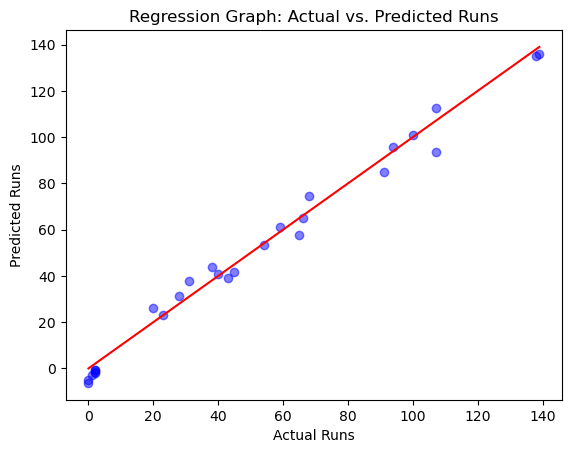

In [50]:
#Creating the scatter plot
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('Actual Runs')
plt.ylabel('Predicted Runs')
plt.title('Regression Graph: Actual vs. Predicted Runs')

#Adding the regression line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')

#Shows the plot
plt.show()